<a href="https://colab.research.google.com/github/zelal-Eizaldeen/proj3-review-sentiment-analysis/blob/main/project3_3113_zelalae2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#                     Project 3: Sentiment Analysis

## Project Repository:
- https://github.com/zelal-Eizaldeen/proj3-review-sentiment-analysis/tree/main

## Interpretability Files
- https://github.com/zelal-Eizaldeen/proj3-review-sentiment-analysis/tree/main/interpretability_plots

## Team contribution
- Zilal Eiz Aldin(Zelalae2@illinois.edu): Training Logistic Regreesion model with hyperparameters process, Evaluate the model to hit the benchmark and Proofreading the report.
- Mesay Taye(mesayst2@illinois.edu): Interpretability of the model using LIME and Technical Report .
- Jianci Zhai (jianciz2@illinois.edu): Preprocessing the data to generate the coefficients/importance of the features for interpretability process.




# Section 1: Technical Details and Performance Metrics



## Technical Details of the Sentiment Classification Model

Our sentiment classification model utilizes **Logistic Regression** with **Elastic Net regularization** to predict the sentiment of movie reviews by using
Embedding features, the 1536-dimensional embeddings generated by OpenAI’s text-embedding-3-large model.

### Model Implementation:

-   **Algorithm**:: Implemented Logistic Regression with Elastic Net regularization (\`penalty=&rsquo;elasticnet&rsquo;\`) to balance between L1 and L2 regularization (\`l1<sub>ratio</sub>=0\`). This configuration primarily employs Ridge Regression (L2) to handle multicollinearity and prevent overfitting.

-   **Solver**:: Selected the &rsquo;saga&rsquo; solver, which is efficient for large datasets and supports Elastic Net regularization.

-   **Hyperparameters**::
    -   \`C=5\`:: Inversely proportional to regularization strength.
    -   \`max<sub>iter</sub>=1000\`:: Sets the maximum number of iterations.
    -   \`random<sub>state</sub>=42\`:: Ensures reproducibility.

-   **Training**:: The model was trained on the preprocessed and vectorized training data, learning to associate feature patterns with sentiment labels.



### Prediction and Evaluation:

-   **Prediction**:: After training, the model predicts the probability of each review belonging to the positive sentiment class.

-   **Evaluation Metric**:: Utilized the Area Under the Receiver Operating Characteristic Curve (AUC-ROC) to assess the model&rsquo;s performance.


## Performance Metrics

The model was evaluated across five distinct data splits with the following results:

<table border="2" cellspacing="0" cellpadding="6" rules="groups" frame="hsides">


<colgroup>
<col  class="org-right" />

<col  class="org-right" />

<col  class="org-left" />
</colgroup>
<thead>
<tr>
<th scope="col" class="org-right">Split</th>
<th scope="col" class="org-right">AUC Score</th>
<th scope="col" class="org-left">Execution Time</th>
</tr>
</thead>
<tbody>
<tr>
<td class="org-right">1</td>
<td class="org-right">0.987140</td>
<td class="org-left">12.71 seconds</td>
</tr>

<tr>
<td class="org-right">2</td>
<td class="org-right">0.986762</td>
<td class="org-left">12.59 seconds</td>
</tr>

<tr>
<td class="org-right">3</td>
<td class="org-right">0.986423</td>
<td class="org-left">12.72 seconds</td>
</tr>

<tr>
<td class="org-right">4</td>
<td class="org-right">0.986954</td>
<td class="org-left">12.51 seconds</td>
</tr>

<tr>
<td class="org-right">5</td>
<td class="org-right">0.986348</td>
<td class="org-left">12.66 seconds</td>
</tr>
</tbody>
<tbody>
<tr>
<td class="org-right">Average</td>
<td class="org-right">0.986665</td>
<td class="org-left">12.64 seconds</td>
</tr>
</tbody>
</table>

**Average AUC:** 0.986665


<a id="org651136a"></a>

## Computer System Specifications

The model was trained and evaluated on the following hardware setup:

-   **System**:: Darwin (macOS)
-   **Processor**:: ARM-based architecture
-   **Physical Cores**:: 14
-   **Total Memory**:: 36.0 GB


<a id="org7f3fcf8"></a>

# Section 2: Interpretability Approach

Below are the key components and steps involved in the model&rsquo;s interpretability, ensuring reproducibility, and to calculate the coefficients corresponding to the features.


### Data Preprocessing:

-   **HTML Removal**:: Employed \`BeautifulSoup\` to strip HTML tags from raw review texts, ensuring only meaningful textual content is processed.

-   **Non-letter Character Removal**:: Utilized regular expressions (\`re\` module) to eliminate all non-alphabetic characters, retaining only letters to reduce noise and focus on relevant textual information.

-   **Lowercasing and Tokenization**:: Converted all text to lowercase and split reviews into individual words (tokens) to maintain consistency and enhance model effectiveness.

-   **Stopword Removal**:: Removed common English stopwords using NLTK&rsquo;s \`stopwords\` corpus. This step eliminates words that do not contribute significantly to sentiment analysis, such as &ldquo;the,&rdquo; &ldquo;is,&rdquo; and &ldquo;and.&rdquo;

To elucidate how our Logistic Regression model arrives at its sentiment predictions, we employed **LIME (Local Interpretable Model-agnostic Explanations)** alongside **Global Interpretability** techniques.


<a id="orgeef9ef7"></a>

## Objective

-   **Local Interpretability**:: While the model achieves high overall performance, it&rsquo;s essential to comprehend the rationale behind individual predictions.

-   **Global Interpretability**:: Understanding the overall influence of features (words/phrases) on the model&rsquo;s predictions to gain insights into its decision-making process.


<a id="org2c84e3c"></a>

## Implementation Steps


<a id="orge01dbb2"></a>

### Local Interpretability with LIME

-   **Selection of Reviews**:: Chose 5 positive and 5 negative reviews from the test set to analyze.

-   **Model-Agnostic Explanation**::
    -   **Perturbation**:: LIME generates perturbed samples by modifying the original text (e.g., removing or altering words).
    -   **Model Predictions**:: The trained Logistic Regression model predicts sentiment probabilities for these perturbed samples.
    -   **Local Model Training**:: LIME fits a simple, interpretable model to approximate the behavior of the complex model in the vicinity of the instance being explained.
    -   **Feature Importance**:: The weights assigned by the local model indicate the importance of each word or phrase in influencing the sentiment prediction.

-   **Visualization and Highlighting**::
    -   **HTML Reports**:: Generated HTML files that visually represent the contribution of each feature (word/phrase) to the prediction.
    -   **Highlighted Reviews**:: Created HTML versions of the original reviews with the top contributing words highlighted to provide a qualitative understanding of the model&rsquo;s decisions.


<a id="org96c853a"></a>

### Global Interpretability

-   **Feature Importance Analysis**:: Examined the Logistic Regression model&rsquo;s coefficients to identify the most influential words and phrases contributing to positive and negative sentiments.

-   **Visualization**:: Generated bar plots showcasing the top 10 positive and top 10 negative coefficients, providing a clear overview of feature significance across the entire model.


<a id="org1b13821"></a>

## Conclusion

Integrating LIME into our sentiment classification pipeline enhances both local and global interpretability. Local explanations provide transparency for individual predictions, fostering trust and facilitating error analysis. Meanwhile, global interpretability offers a comprehensive understanding of feature influences, guiding future model refinements and ensuring alignment with domain knowledge.

This dual approach underscores our commitment to building reliable, transparent, and accountable machine learning systems.



# Code for interpretability
- All the necessary code within mymain.py file.
- For reproducibility of the results please make sure to:
 -  install the following libraries


In [ ]:
pip install bs4
pip install seaborn
pip install lime
pip install nltk

 - use the following command in the terminal

In [ ]:
python mymain.py --interp

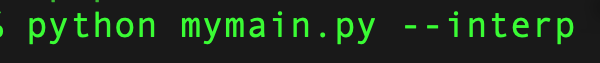

- Final Output: https://github.com/zelal-Eizaldeen/proj3-review-sentiment-analysis/tree/main/interpretability_plots

## Resources:
- Kaggle: https://www.kaggle.com/c/word2vec-nlp-tutorial
- What we have tried 1: https://campuswire.com/c/GB46E5679/feed/785